In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train_features = pd.read_csv('data/dengue_features_train.csv', index_col= [0, 1, 2])
df_train_labels = pd.read_csv('data/dengue_labels_train.csv', index_col= [0, 1, 2])
df_test = pd.read_csv('data/dengue_features_test.csv', index_col= [0, 1, 2])

In [3]:
sj_train_features = df_train_features.loc['sj']
iq_train_features = df_train_features.loc['iq']

sj_test_features = df_test.loc['sj']
iq_test_features = df_test.loc['iq']

sj_train_labels = df_train_labels.loc['sj']
iq_train_labels = df_train_labels.loc['iq']

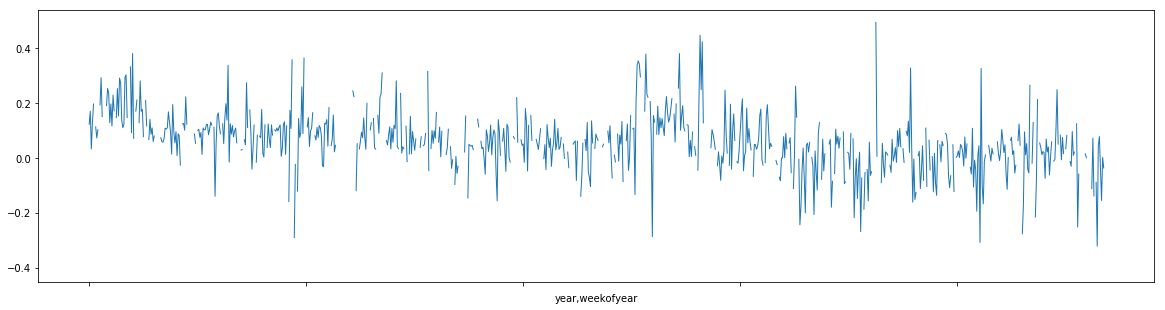

In [4]:
plt.figure(figsize = (20, 5))
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.show()

In [5]:
#to check empty columns
print  sj_train_features.shape
sj_train_features.isnull().any(axis = 0)

(936, 21)


week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [27]:

sj_train_features.sort_index(inplace = True)
sj_train_features.fillna(method = 'ffill', inplace = True)
sj_test_features.fillna(method = 'ffill', inplace = True)

iq_train_features.sort_index(inplace = True)
iq_train_features.fillna(method = 'ffill', inplace = True)
iq_test_features.fillna(method = 'ffill', inplace = True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
sj_train_features.drop('week_start_date', axis = 1, inplace = True)
                       
iq_train_features.drop('week_start_date', axis = 1, inplace = True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


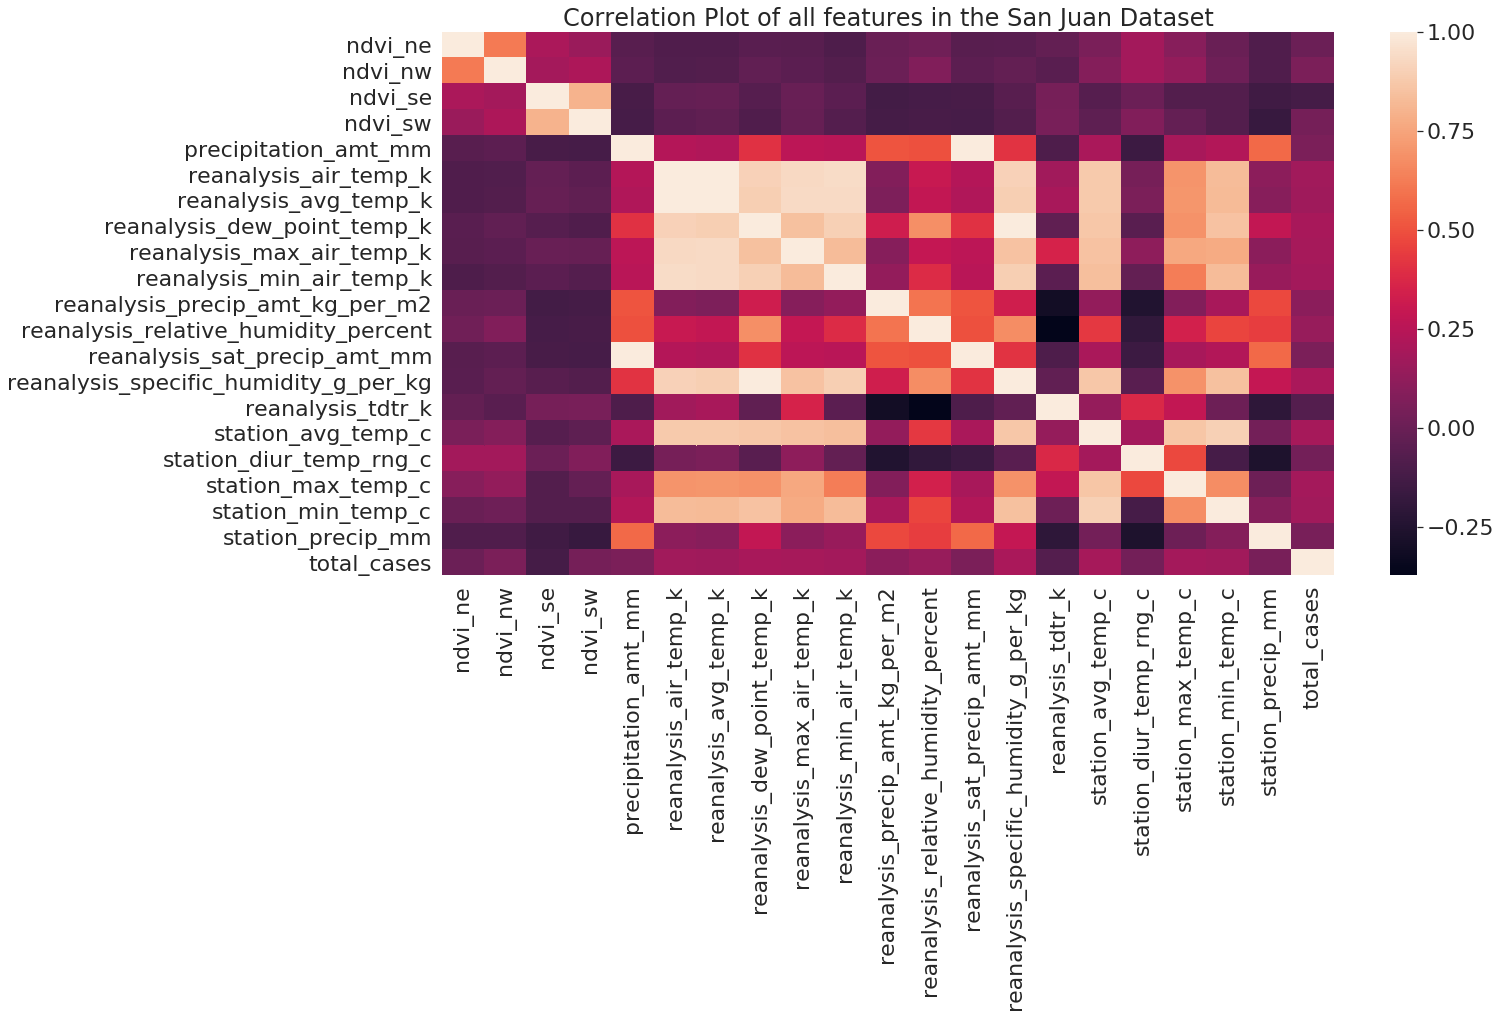

In [8]:

import seaborn as sns

sj_train_features['total_cases'] = sj_train_labels['total_cases']

sj_corr = sj_train_features.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


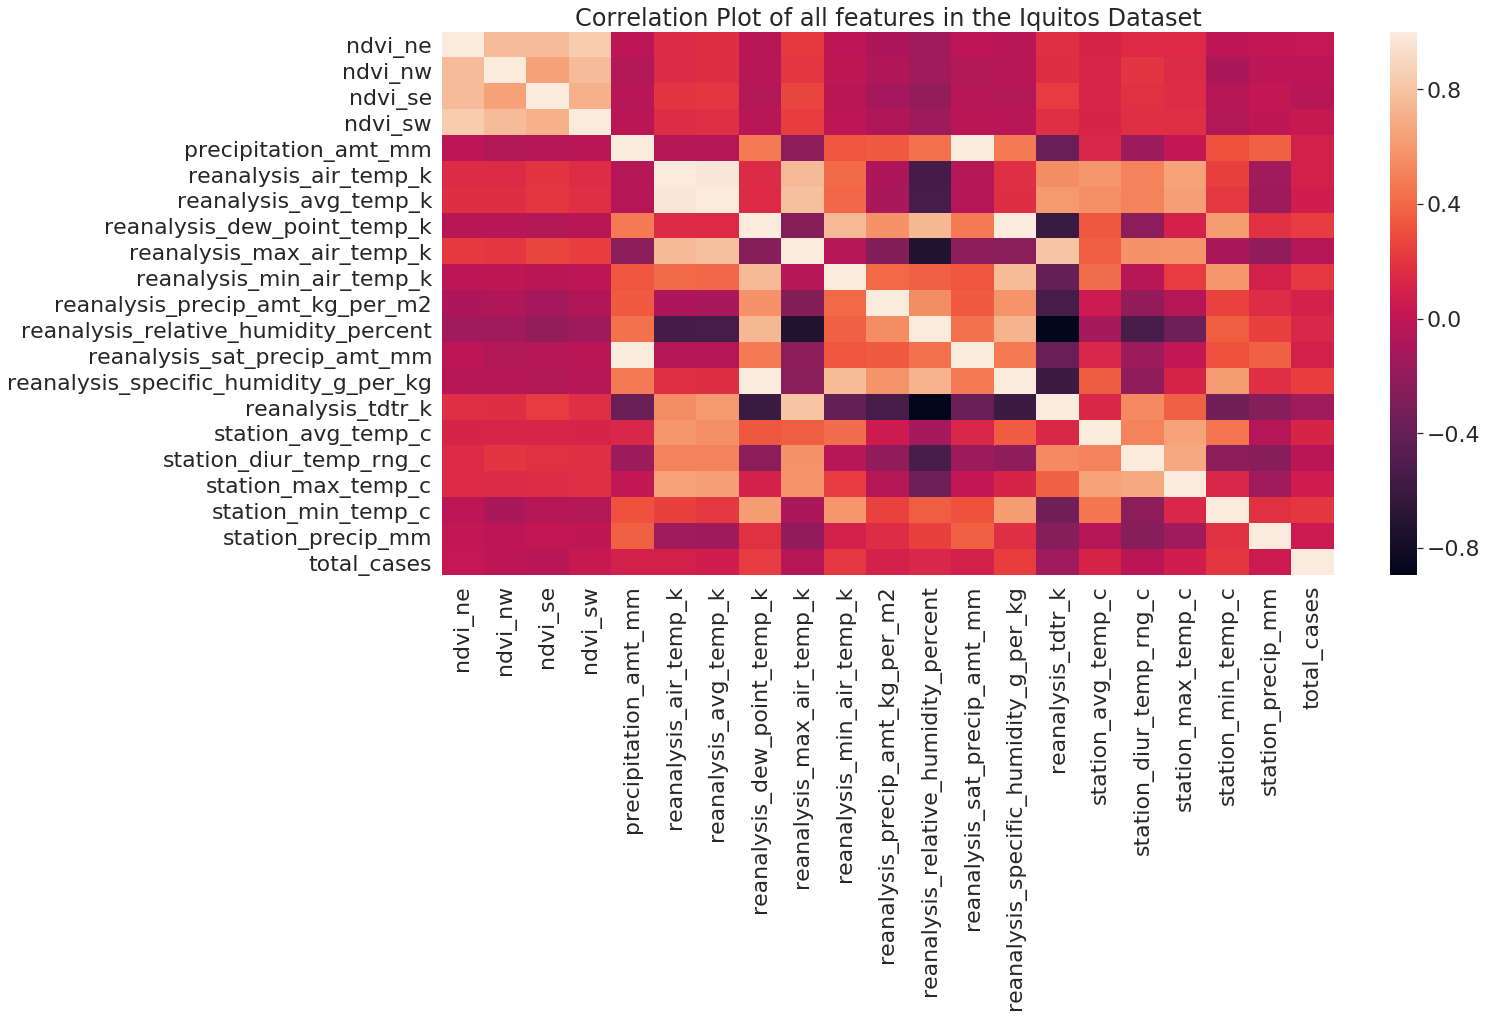

In [9]:
iq_train_features['total_cases'] = iq_train_labels['total_cases']

iq_corr = iq_train_features.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')
plt.show()

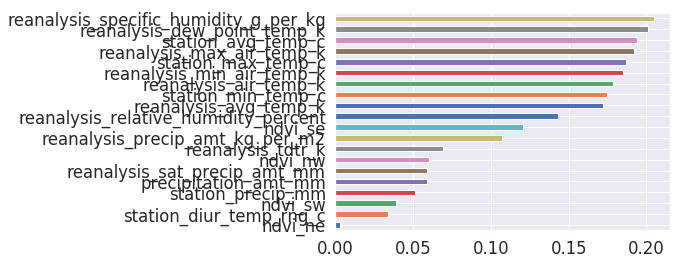

In [10]:
sns.set(font_scale = 1.5)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

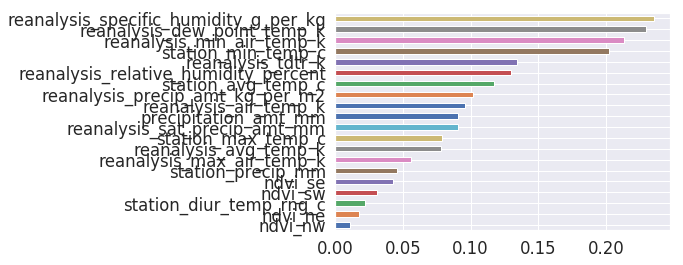

In [11]:
sns.set(font_scale = 1.5)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

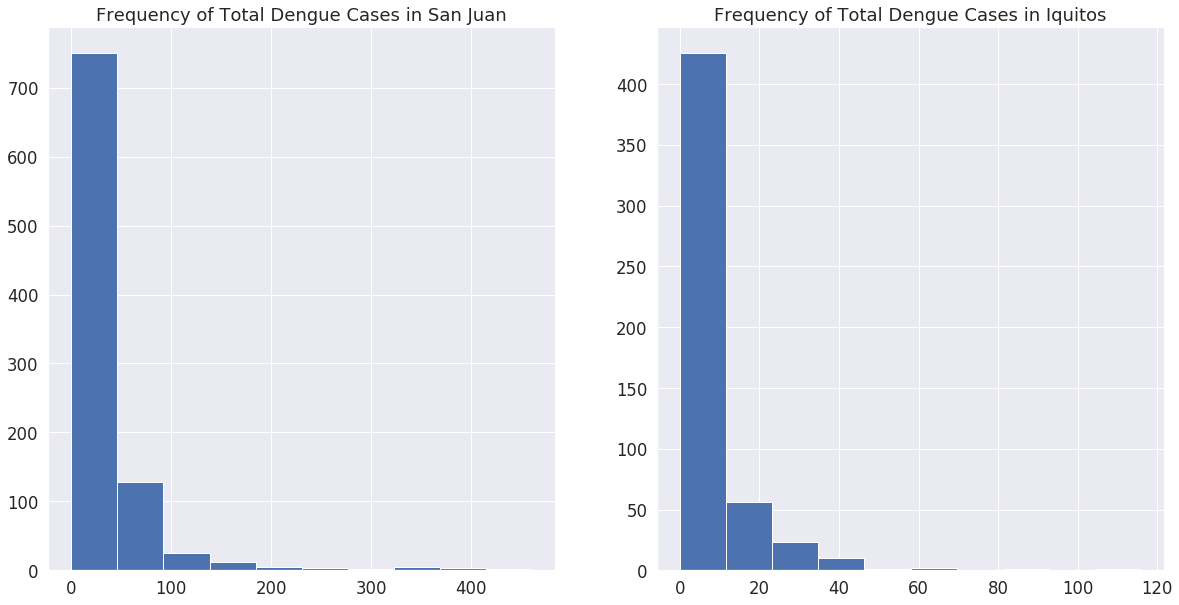

In [12]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(sj_train_features['total_cases'])
plt.title('Frequency of Total Dengue Cases in San Juan')

plt.subplot(1, 2, 2)
plt.hist(iq_train_features['total_cases'])
plt.title('Frequency of Total Dengue Cases in Iquitos')

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_sj = sj_train_features.ix[:, 0:20]
y_sj = sj_train_features['total_cases']
X_sj_train, y_sj_train = X_sj.ix[:750, :], y_sj[0:750]
X_sj_cv, y_sj_cv = X_sj.ix[751:, :], y_sj[751:]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [14]:
X_iq = iq_train_features.ix[:, 0:20]
y_iq = iq_train_features['total_cases'] 
X_iq_train, y_iq_train = X_iq.ix[:360, :], y_iq[0:360]
X_iq_cv, y_iq_cv = X_iq.ix[361:, :], y_iq[361:]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecate

In [15]:
imptVar = abs(iq_corr).total_cases.drop('total_cases').sort_values(ascending = False).index[0:4]

In [16]:
X_sj_temp_train = X_sj_train[imptVar] 
X_sj_temp_cv = X_sj_cv[imptVar]
X_sj_temp_test = sj_test_features[imptVar]

X_iq_temp_train = X_iq_train[imptVar] 
X_iq_temp_cv = X_iq_cv[imptVar]
X_iq_temp_test = iq_test_features[imptVar]

In [17]:
X_sj_temp_train['y'] =  y_sj_train.values
X_sj_temp_cv['y'] = y_sj_cv.values

X_iq_temp_train['y'] = y_iq_train.values
X_iq_temp_cv['y'] = y_iq_cv.values

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [18]:
sj_rng = pd.date_range('30/04/1990', periods = len(sj_train_features), freq = 'W')
iq_rng = pd.date_range('26/06/2000', periods = len(iq_train_features), freq = 'W')

In [19]:
X_sj_temp_train.index = sj_rng[:750]
X_sj_temp_cv.index = sj_rng[751:]

X_iq_temp_train.index = iq_rng[:360]
X_iq_temp_cv.index = iq_rng[361:]

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

def best_nb_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mae = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = map(int, map(round, nb_model.predict(cv)))
        mae = eval_measures.meanabs(cv_pred, cv.y)
        
        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    return smf.glm(formula = formula, data = total,
                   family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

In [21]:
def best_poisson_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    
    model = smf.glm(formula = formula, data = train,
                    family = sm.families.Poisson())
    poisson_model = model.fit()
        
    cv_pred = map(int, map(round, poisson_model.predict(cv)))
    mae = eval_measures.meanabs(cv_pred, cv.y)
        
    total = pd.concat([train, cv])

    return smf.glm(formula = formula, data = total,
                   family = sm.families.Poisson()).fit()

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def best_ridge_model(train, cv):
    ridge = Ridge(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-5, 3, 50)}
    
    model = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
    
    X_var = imptVar
    ridgereg = model.fit(train[X_var], train.y)
        
    cv_pred = map(int, map(round, ridgereg.predict(cv[X_var])))
    mae = eval_measures.meanabs(cv_pred, cv.y)
        
    total = pd.concat([train, cv])
    
    return model.fit(total[X_var], total.y)

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

def best_lasso_model(train, cv):
    lasso = Lasso(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-5, 3, 50), }
    
    model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
    
    X_var = imptVar
    lassoreg = model.fit(train[X_var], train.y)
        
    cv_pred = map(int, map(round, lassoreg.predict(cv[X_var])))
    mae = eval_measures.meanabs(cv_pred, cv.y)
        
    total = pd.concat([train, cv])

    return model.fit(total[X_var], total.y)

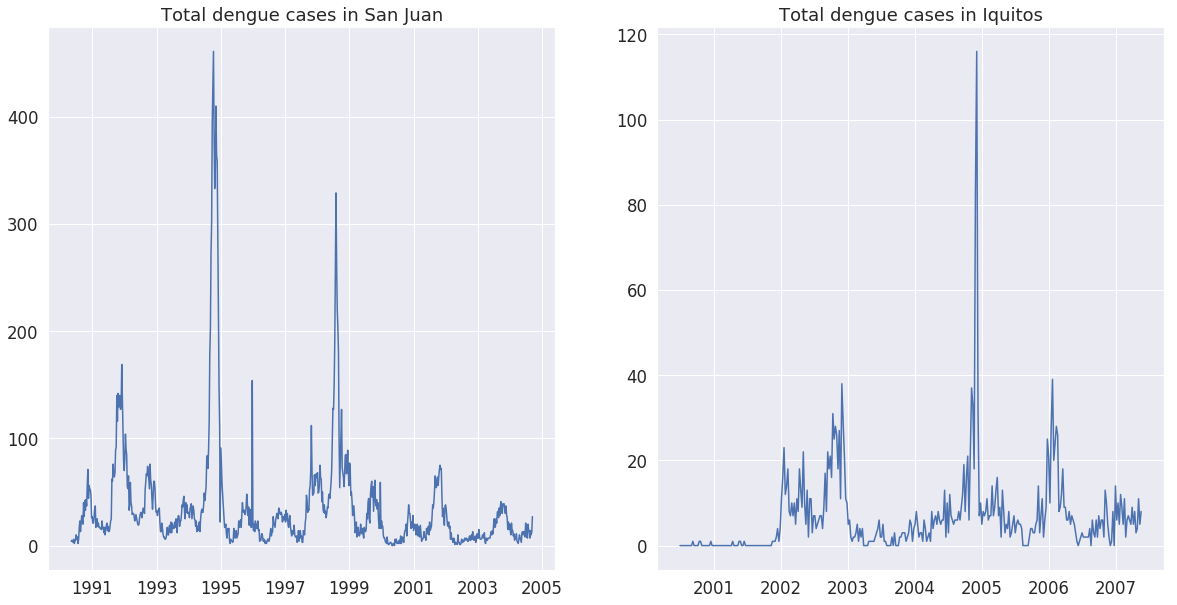

In [24]:
from statsmodels.tsa.stattools import adfuller

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot_date(X_sj_temp_train.index, X_sj_temp_train.y.values, '-')
plt.title('Total dengue cases in San Juan')

plt.subplot(1, 2, 2)
plt.plot_date(X_iq_temp_train.index, X_iq_temp_train.y.values, '-')
plt.title('Total dengue cases in Iquitos')

plt.show()

In [25]:
adf_sj_test = adfuller(X_sj_temp_train.y)
adf_iq_test = adfuller(X_iq_temp_train.y)
    
print('ADF Statistic: %f' % adf_sj_test[0])
print('p-value: %f' % adf_sj_test[1])
print('Critical Values:' )
for key, value in adf_sj_test[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('ADF Statistic: %f' % adf_iq_test[0])
print('p-value: %f' % adf_iq_test[1])
print('Critical Values:' )
for key, value in adf_iq_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.635065
p-value: 0.000111
Critical Values:
	5%: -2.865
	1%: -3.439
	10%: -2.569
ADF Statistic: -5.123416
p-value: 0.000013
Critical Values:
	5%: -2.870
	1%: -3.449
	10%: -2.571


In [26]:
def time_iq_series(train):
    series = map(float, X_iq_temp_train.y)
    model = sm.tsa.ARIMA(series, order = (3, 1, 1), exog = X_iq_temp_train[imptVar].diff())
    model_fit = model.fit()
    print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot(figsize = (20, 6))
    plt.show()
    return model_fit
    
tsa_iq = time_iq_series(X_iq_temp_train)

/usr/local/lib/python2.7/dist-packages/statsmodels/base/data.py:131: RuntimeWarning: invalid value encountered in reduce
  ptp_ = self.exog.ptp(axis=0)


MissingDataError: exog contains inf or nans

In [ ]:
forecast_sj = tsa_sj.predict(1, len(X_sj_temp_cv), 
                             exog = X_sj_temp_cv[imptVar]) + X_sj_temp_train.y.values[-1]
forecast_iq = tsa_iq.predict(1, len(X_iq_temp_cv), 
                             exog = X_iq_temp_cv[imptVar]) + + X_iq_temp_cv.y.values[-1]

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot(X_sj_temp_cv.index, forecast_sj,
         X_sj_temp_cv.index, X_sj_temp_cv.y)

plt.subplot(1, 2, 2)
plt.plot(X_iq_temp_cv.index, forecast_iq,
         X_iq_temp_cv.index, X_iq_temp_cv.y)

plt.show()

In [ ]:
best_sj_model = best_nb_model(X_sj_temp_train, X_sj_temp_cv)
best_iq_model = best_nb_model(X_iq_temp_train, X_iq_temp_cv)